In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

C:\Users\Hemanth\Anaconda3\envs\tensorflowenv\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Hemanth\Anaconda3\envs\tensorflowenv\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 294us/step - loss: 0.5771 - acc: 0.7325 - val_loss: 0.4379 - val_acc: 0.8625
Epoch 2/20
15000/15000 [==============================] - 4s 274us/step - loss: 0.3478 - acc: 0.8980 - val_loss: 0.3422 - val_acc: 0.8778
Epoch 3/20
15000/15000 [==============================] - 4s 270us/step - loss: 0.2486 - acc: 0.9212 - val_loss: 0.2899 - val_acc: 0.8920
Epoch 4/20
15000/15000 [==============================] - 4s 278us/step - loss: 0.1940 - acc: 0.9396 - val_loss: 0.2884 - val_acc: 0.8859
Epoch 5/20
15000/15000 [==============================] - 4s 271us/step - loss: 0.1592 - acc: 0.9499 - val_loss: 0.2864 - val_acc: 0.8873
Epoch 6/20
15000/15000 [==============================] - 4s 269us/step - loss: 0.1306 - acc: 0.9605 - val_loss: 0.3036 - val_acc: 0.8800
Epoch 7/20
15000/15000 [==============================] - 4s 272us/step - loss: 0.1098 - acc: 0.9684 - val_loss: 0.3185 - 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

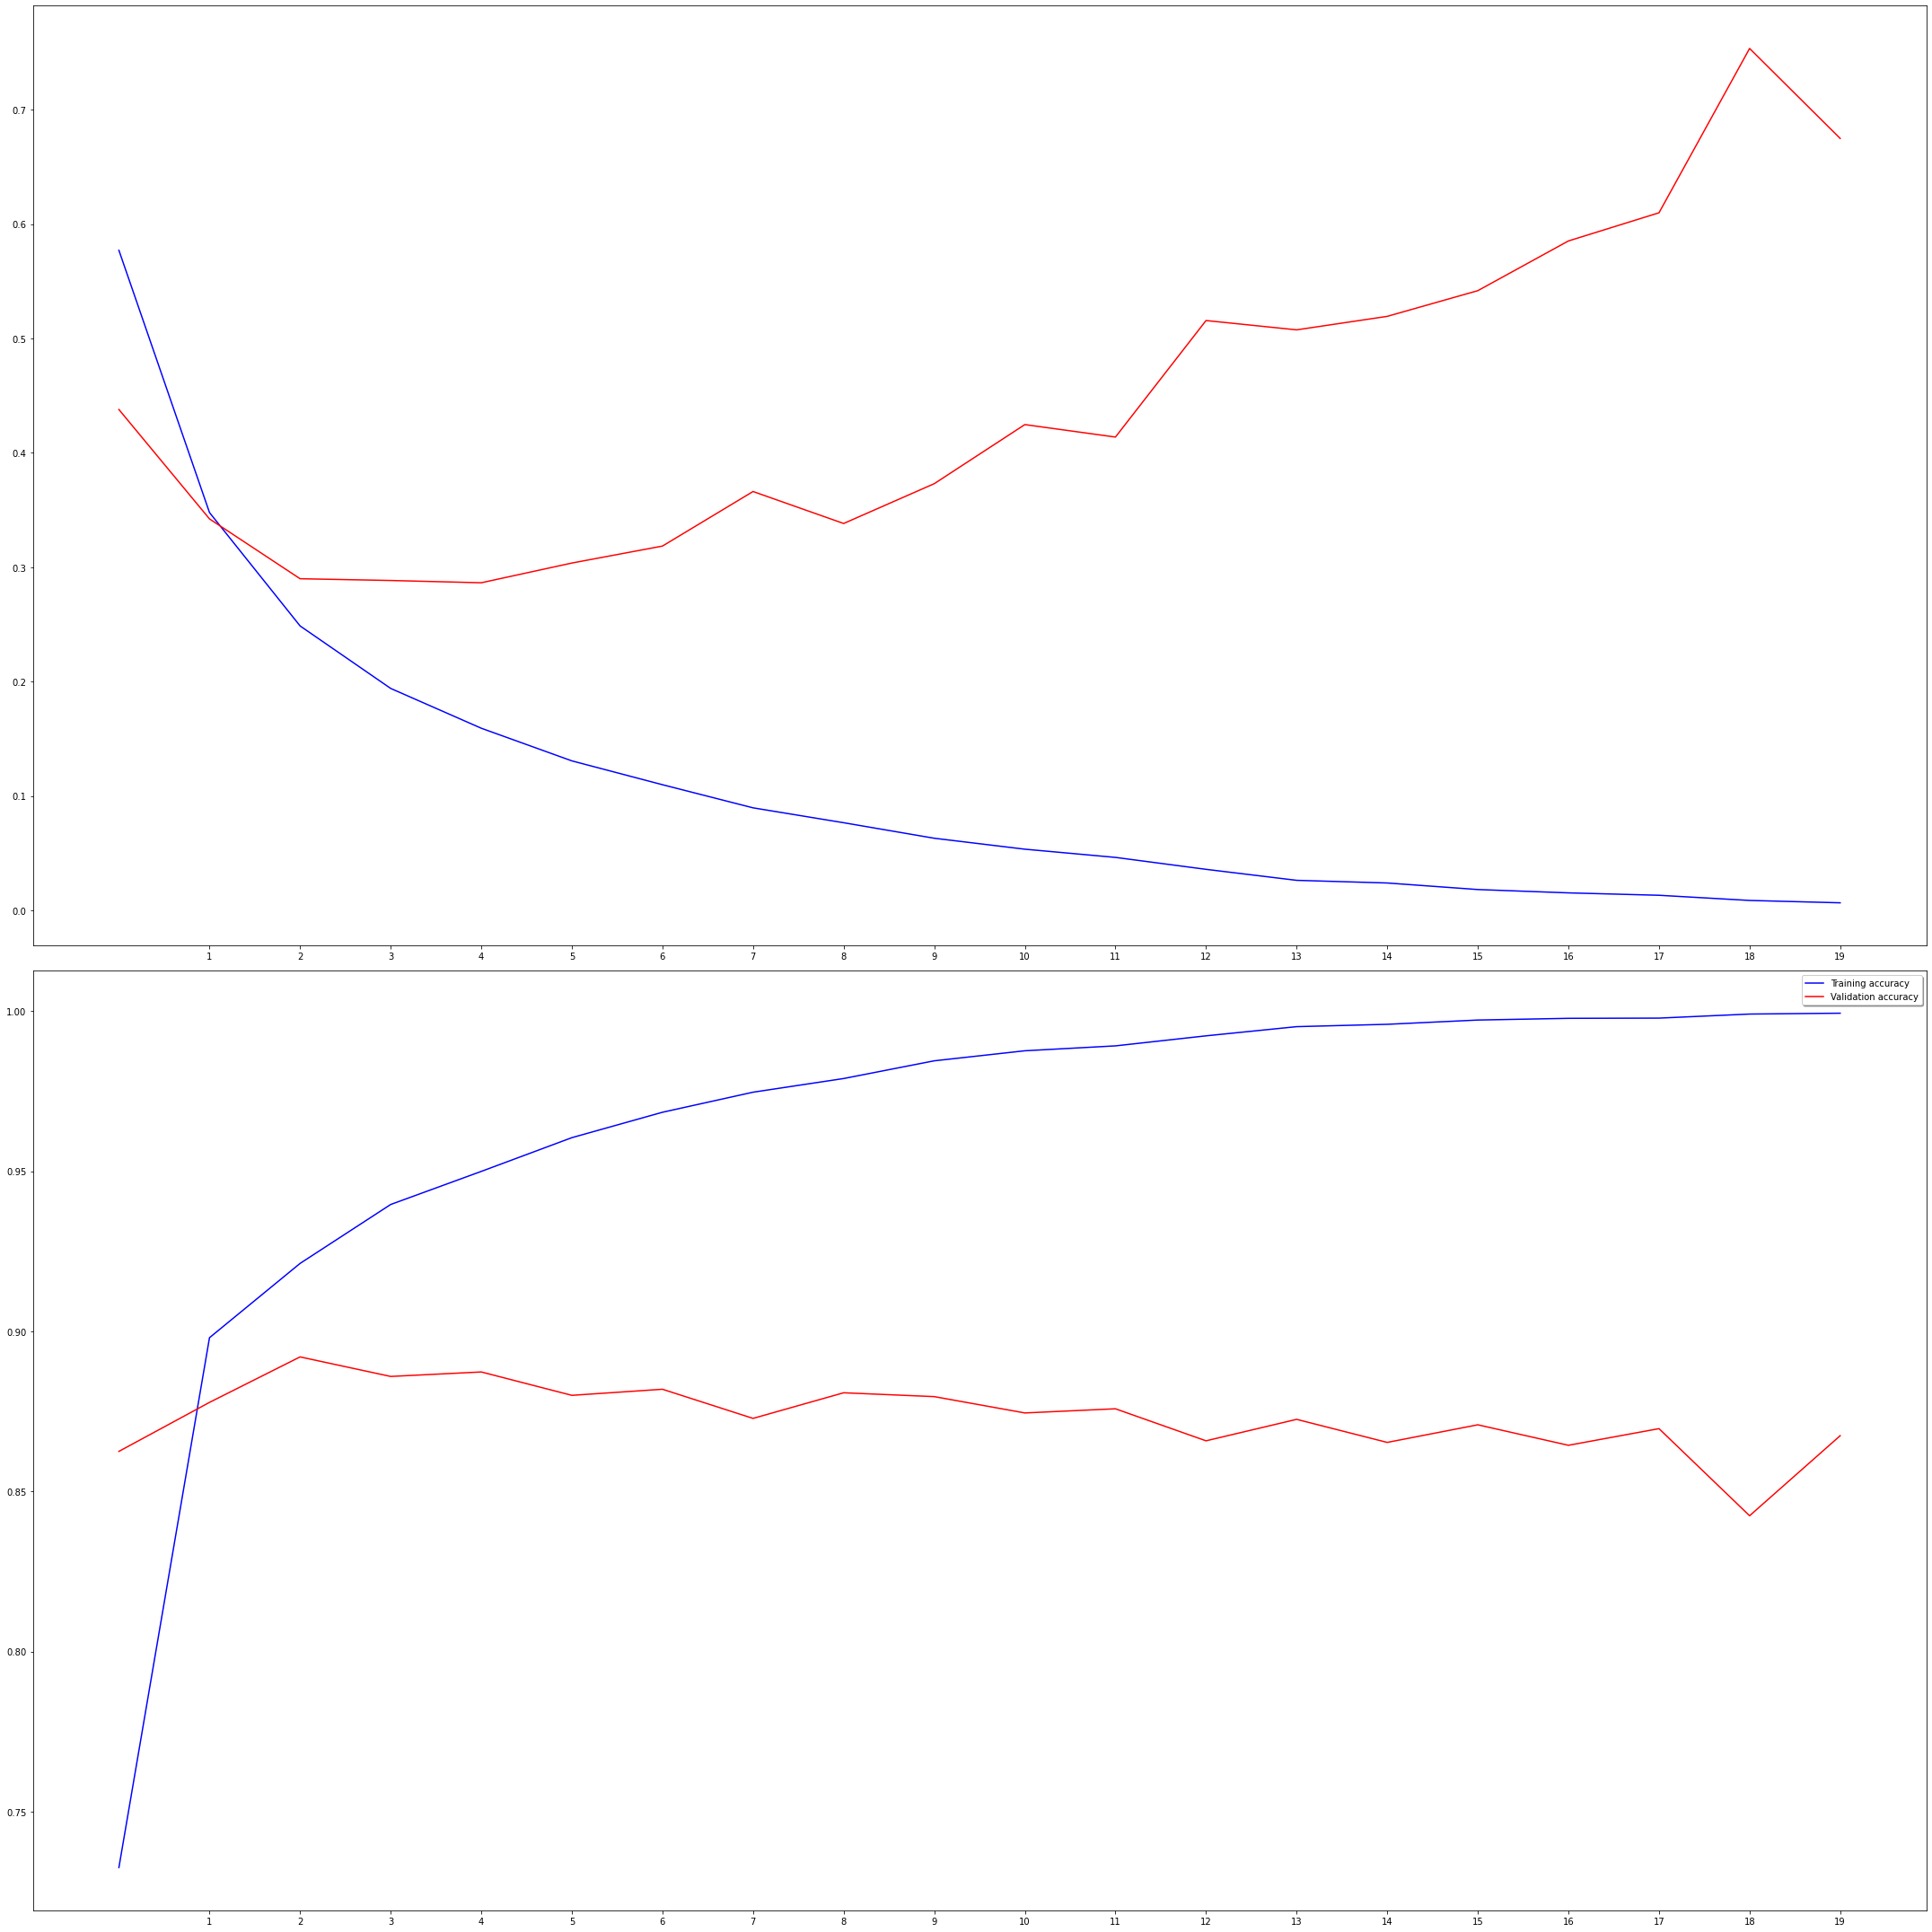

In [19]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30,30))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 20, 1))
#ax1.set_yticks(np.arange(0, 0.7, 0.02))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 20, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [21]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/2
25000/25000 [==============================] - 5s 192us/step - loss: 0.4505 - accuracy: 0.8160
Epoch 2/2
25000/25000 [==============================] - 10s 396us/step


In [22]:
results

[0.29629059438228605, 0.8808000087738037]